# Chapter 1 Basic techniques and methods 
# The Mean-Field Ferromagnet of Curie & Weiss

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

## Exercise 1.4 Metropolis-Hastings Algorithm

Consider the Hamiltonian of the Currie-Weiss model:

$$  {\cal H} ( {\bf S}; h  )    = - \frac{1}{2 N} \sum_{j = 1}^{N} \sum_{k = 1}^{N} S_j S_k    - h  \sum_{j=1}^{N} S_j  \;.  $$ 

A very practical way to sample configurations of $N$ spins from the Gibbs-Boltzmann distribution, 

$$ P ( {\bf S } = {\bf s} | \beta, h ) = \frac{ \exp(-\beta {\cal H} ( {\bf s}; h  ) ) }{  Z_N  (\beta; h) }   \;$$

is the Monte-Carlo Markov Chain (MCMC) method, and in particular the Metropolis-Hastings algorithm. It works as follows:

1. Choose a starting configuration for the $N$ spins values $ s_j = \pm 1$ for $j=1, ..., N$.
2. Choose a spin $j$ at random. Compute the current value of the energy $E_{\text{now}}$ and the value of the energy $E_{\text{flip}}$ if the spin $j$ is flipped (that is if $S_{j}^{\text{new}} = - S_{j}^{\text{old}}  $)
3. Sample a number $r$ uniformly in $[0,1]$ and if $   r <  e^{ -\beta  ( E_{\text{flip}} - E_{\text{now}}  ) }$, perform the flip (that is $S_{j}^{\text{new}} = - S_{j}^{\text{old}}  $). Otherwise leave as it is.
4. Go back to step 2.

If one is performing this program long enough, it is guaranteed that the final configuration $ {\bf S} $ will have been chosen with the correct probability.

## Code to perform the MCMC dynamics

Observe that the Curie-Weiss Hamiltonian can be written as 

$$ {\cal H} (   m ; h  )    = - N \left( \frac{1}{2} m^2 + h   m \right)  \;, $$
with $ m \equiv \sum_{j=1}^{N} S_{j} / N  $.


In [38]:
def MC(S0, beta, h):
        
    S1 = np.copy(S0)
    N = len(S0)
    j = np.random.randint(0, N)
    
    S1[j] = -S1[j]
    r = np.random.random()
    
    en0 =  -0.5*N*np.mean(S0)*np.mean(S0) - N*h*np.mean(S0)
    en1 =  -0.5*N*np.mean(S1)*np.mean(S1) - N*h*np.mean(S1)
    
    
    if r < np.exp(-beta*(en1 - en0)):
        S0[j] = -S0[j]
        
    return S0

In [39]:
def MCMC(N, beta, h):
    
    t_max = 100*N
    S0 = np.ones(N)
    
    m_ = []
    
    for k in range(t_max):
        Sk = MC(S0, beta, h)
        S0 = np.copy(Sk)
    
        m = np.mean(S0)
        m_.append(m)
        
    return m_

We also write a function to compute the *free entropy* $ \phi (m; \beta, h) $, which is given by

$$ \phi(m, \beta, h) = \frac{1}{2} \beta m^2   + \beta h m + H(m)    \;, $$
where the function $H(m)$ is the binary entropy,  
$$  H(m) = - \left( \frac{1+m}{2} \right) \log \left( \frac{1+m}{2} \right) - \left( \frac{1-m}{2} \right) \log \left( \frac{1-m}{2} \right)    $$

In [2]:
def phi(m, beta, h):
    H = -0.5*(1 + m)*np.log(0.5*(1 + m)) - 0.5*(1 - m)*np.log(0.5*(1 - m))
    return H + beta*h*m + 0.5*beta*m*m

#### a) Case $ h = 0 $ and $ \beta = 1.2$ 

As suggested we run the code for $ N = 10,50,100,200,1000 $ spins until $ t_{\text{max}} = 100 N $ and plot the dynamics.

In [174]:
N = [10, 50, 100, 200, 1000]
mN_ = []
beta = 1.2
h = 0

for n in N:
    print('N = ', n)
    mN_.append(MCMC(n, beta, h))

N =  10
N =  50
N =  100
N =  200
N =  1000


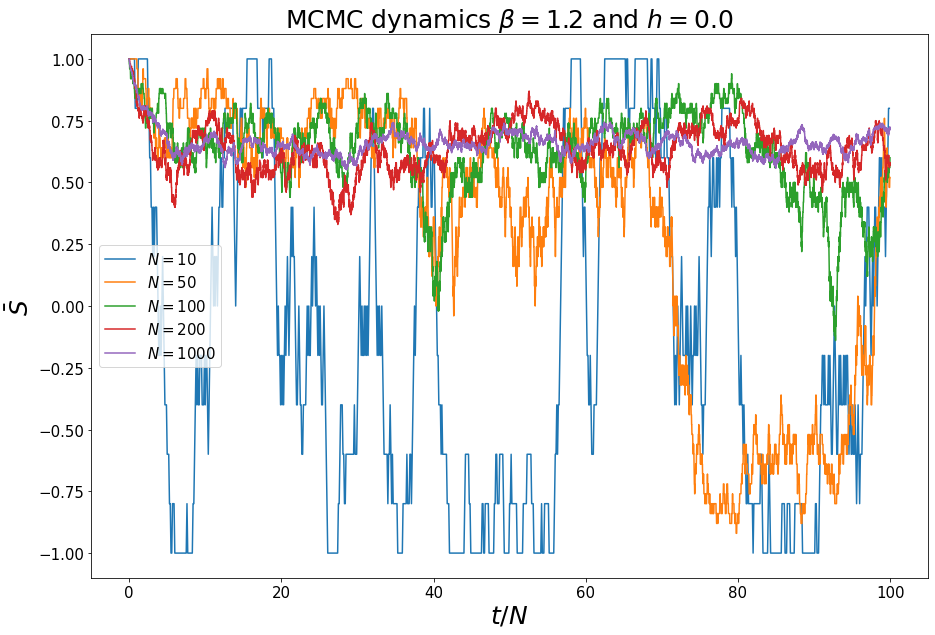

In [194]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))

for n, m in zip(N, mN_):
    ax.plot(np.arange(0, len(m)) / n ,  m, label= '$N = %d$' % n)
    
ax.set_xlabel('$t/N$', fontsize= 25)
ax.set_ylabel('$m$', fontsize= 25)
ax.tick_params(labelsize=15)
ax.legend(fontsize= 15)
ax.set_title('MCMC dynamics $\\beta =  %.1f $ and $h = %.1f $' % (beta, h), fontsize= 25)
plt.show()

Clearly, as we increase $N$, the convergence of the algorithm is improved (large deviation principle). For $N > 100$ it already oscilates around $ m^{*} \approx 0.66$, which is the value we expect the algorithm to converge if the initial state is taken with $m_0 = 1$. 

The exact value can be obtained by the Curie-Weiss equation. Actually there are two solutions, $m^{*} \approx \pm 0.66$, which correspond to two maximus of the free entropy. Since we start with $m_0 = 1$, the algorithm converges to $m^{*} \approx  0.66$ for $N$ sufficiently large (for $N$ small it oscilates between positive and negative solutions). If we had started with $m_0 = -1$, it would have converged to $m^{*} \approx  -0.66$. Finally it is interesting to remark the case $m_0 = 0$, where the algorithm could converge either to $m^{*} > 0 $ or $m^{*} < 0 $.

-0.6582382382382382


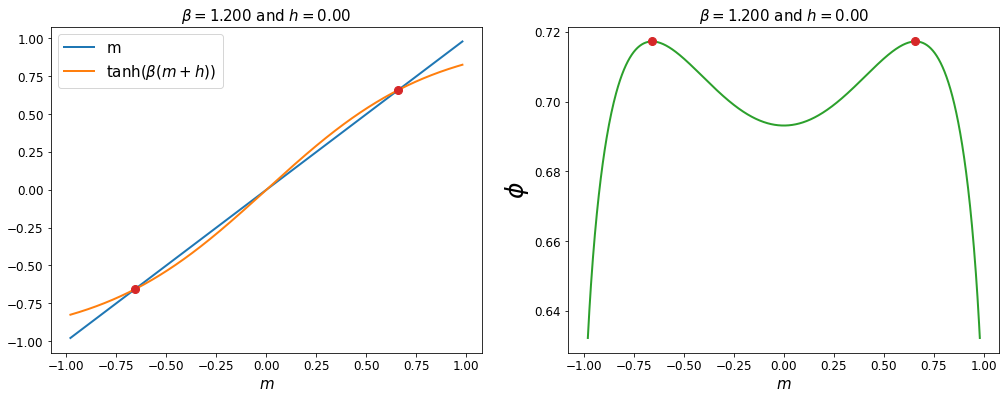

In [60]:
m = np.linspace(-0.98, 0.98, 1000)

f, ax = plt.subplots(1, 2, figsize = (17, 6))   
    
ax[0].plot(m, m, label= 'm', lw= 2.0)
ax[0].plot(m, np.tanh(beta*(h + m)), label= '$\\tanh ( \\beta (m + h))$', lw= 2.0)
ax[0].set_xlabel('$m$', fontsize= 15)
ax[0].tick_params(labelsize=12)
ax[0].set_title('$\\beta =  %.3f $ and $h = %.2f $' % (beta, h), fontsize= 15)
ax[0].legend(fontsize= 15)

ax[1].plot(m,  phi(m, beta, h), lw= 2.0, color= 'C2')
ax[1].set_xlabel('$m$', fontsize= 15)    
ax[1].set_title('$\\beta =  %.3f $ and $h = %.2f $' % (beta, h), fontsize= 15)
ax[1].set_ylabel('$\\phi$', fontsize= 25)
ax[1].tick_params(labelsize=12)

phi_star = np.max(phi(m, beta, h))
m_star = m[phi(m, beta, h).argmax()]
print(m_star)

ax[0].plot(m_star, m_star, marker= 'o', color= 'C3',  markersize= 8)
ax[0].plot(-m_star, -m_star, marker= 'o', color= 'C3', markersize= 8)
ax[1].plot(m_star, phi(m_star, beta, h), marker= 'o', color= 'C3',  markersize= 8)
ax[1].plot(-m_star, phi(-m_star, beta, h), marker= 'o', color= 'C3', markersize= 8)

plt.show()

#### b) Case $ h = - 0.1 $ and $ \beta = 1.2$

In [177]:
N = [10, 50, 100, 200, 1000]
mN1_ = []
beta1 = 1.2
h1 = -0.1

for n in N:
    print('N = ', n)
    mN1_.append(MCMC(n, beta1, h1))

N =  10
N =  50
N =  100
N =  200
N =  1000


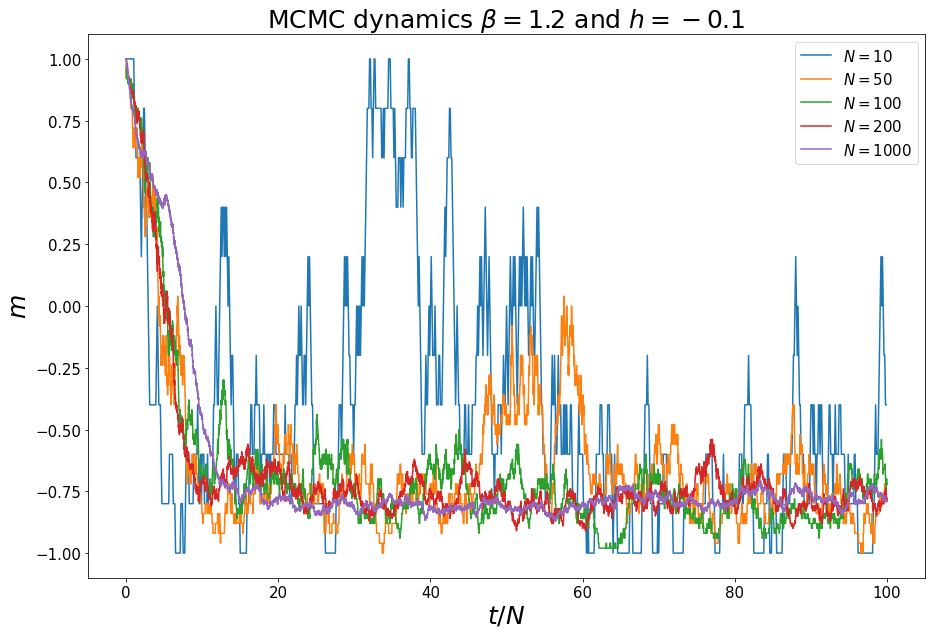

In [196]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))

for n, m in zip(N, mN1_):
    ax.plot(np.arange(0, len(m)) / n ,  m, label= '$N = %d$' % n)
    
ax.set_xlabel('$t/N$', fontsize= 25)
ax.set_ylabel('$m$', fontsize= 25)
ax.tick_params(labelsize=15)
ax.legend(fontsize= 15)
ax.set_title('MCMC dynamics $\\beta =  %.1f $ and $h = %.1f $' % (beta1, h1), fontsize= 25)
plt.show()

Clearly, as we increase $N$, the convergence of the algorithm is improved. For $N \ge 50$ it already oscilates around $ m^{*} \approx -0.78$, which is the value we expect the algorithm to converge.

The exact value can be obtained by the Curie-Weiss equation. In this case, the non-zero external field breaks the symmetry and there is only one solution: the free entropy has only one global maxinum.

-0.7820202020202021


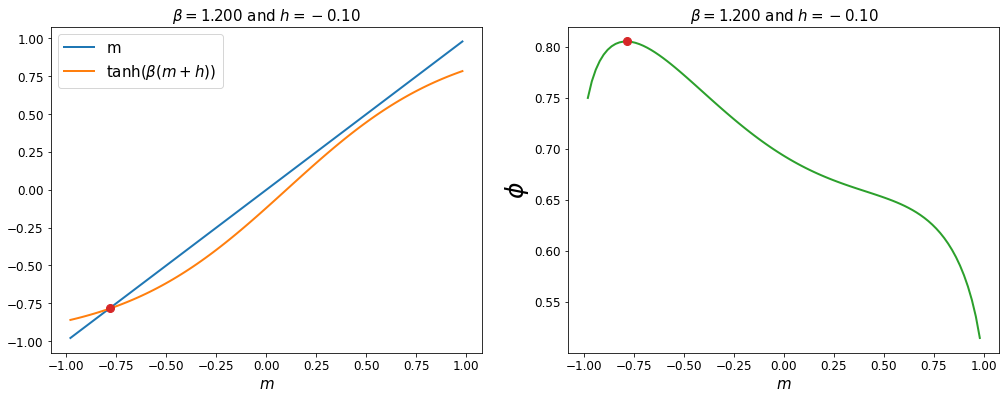

In [61]:
m = np.linspace(-0.98, 0.98, 100)

f, ax = plt.subplots(1, 2, figsize = (17, 6))   
    
ax[0].plot(m, m, label= 'm', lw= 2.0)
ax[0].plot(m, np.tanh(beta1*(h1 + m)), label= '$\\tanh ( \\beta (m + h))$', lw= 2.0)
ax[0].set_xlabel('$m$', fontsize= 15)
ax[0].tick_params(labelsize=12)
ax[0].set_title('$\\beta =  %.3f $ and $h = %.2f $' % (beta1, h1), fontsize= 15)
ax[0].legend(fontsize= 15)

ax[1].plot(m,  phi(m, beta1, h1), lw= 2.0, color= 'C2')
ax[1].set_xlabel('$m$', fontsize= 15)    
ax[1].set_title('$\\beta =  %.3f $ and $h = %.2f $' % (beta1, h1), fontsize= 15)
ax[1].set_ylabel('$\\phi$', fontsize= 25)
ax[1].tick_params(labelsize=12)

phi_star1 = np.max(phi(m, beta1, h1))
m_star1 = m[phi(m, beta1, h1).argmax()]
print(m_star1)

ax[0].plot(m_star1, m_star1, marker= 'o', color= 'C3',  markersize= 8)
ax[1].plot(m_star1, phi(m_star1, beta1, h1), marker= 'o', color= 'C3',  markersize= 8)

plt.show()

## Exercise 1.5 Glauber Algorithm

An alternative local algorithm to sample from the measure

$$ P ( {\bf S } = {\bf s} | \beta, h ) = \frac{ \exp(-\beta {\cal H} ( {\bf s}; h  ) ) }{  Z_N  (\beta; h) }   \;$$

is known as the Glauber or Heat bath algorithm. Instead of flipping a spin at random, the idea is to thermalise this spin with its local environment. 

### Part I: The algorithm

a) Consider a certain spin variable $ S_k = \pm 1$ and let $P_{\pm} (t) $ represent the probability of finding this spin in a state $ \pm 1 $ at time $t$. Naturally

$$  P_{+}(t) + P_{-} (t)= 1     \;. $$

Now consider the quantity

$$ \langle \tilde{m} (t) \rangle \equiv  \sum_{S_k = \pm } S_k P_{S_k}(t) = P_{+}(t) - P_{-}(t)    \;,  $$  
which is simply the expectation value of the spin as a function of time. This leads to 

$$   P_{\pm} (t)  = \frac{1 \pm   \langle \tilde{m} (t) \rangle }{2} $$ 

Now let $ m_t = \frac{1}{N} \sum_{k=1}^{N} S_{k}^{t} $ be the total magnetisation of the system at time $t$. For $N$ sufficiently large, we have $ m_t \rightarrow  \langle \tilde{m} (t) \rangle $ and can write in this limit:

$$   P_{\pm}^{t}  = \frac{1 \pm   m_t  }{2}  \;, $$
with a shorter notation $P_{\pm}^{t} = P_{\pm} (t) $.

Supposing the spin system satisfies the Curie-Weiss equation $ m_t = \tanh( \beta ( m_t + h ) ) $ for all $t$, we have

$$   P_{\pm}^{t}  = \frac{1 \pm   \tanh( \beta ( m_t + h ) )  }{2}  \;. $$


b) The Glauber algorithm is defined as follows:

1. Choose a starting configuration for the $N$ spins. Compute the magnetisation $m_t$ and the energy $E_t$ corresponding to the configuration.
2. Choose a spin $S_j$ at random. Sample a random number uniformly $r \in [0,1]$. If $ r < P_{+} $, set $ S_j = +1$, otherwise set $S_j = -1$. Update the energy and magnetisation.
3. Repeat step 2 until convergence.

### Code to perform Glauber dynamics

Observe that the Curie-Weiss Hamiltonian can be written as 

$$ {\cal H} (  m ; h  )    = - N \left( \frac{1}{2} m^2 + h   m \right)  \;, $$
with $ m \equiv \sum_{j=1}^{N} S_{j} / N  $.

In [184]:
def Glauber(S, beta, h):
        
   
    N = len(S)   
    j = np.random.randint(0, N)
    r = np.random.random()
    
    p_plus = 0.5*(1 + np.tanh(beta*np.mean(S) + beta*h))
    
    if r < p_plus:
        S[j] = +1.
    else:
        S[j] = -1.
    
    return S

In [185]:
def Glauber_dyn(N, beta, h):
    
    t_max = 100*N
    S0 = np.ones(N)
    
    m_ = []
    m_.append(np.mean(S0))
    
    for k in range(t_max):
        
        Sk = Glauber(S0, beta, h)
        S0 = np.copy(Sk)
        
        m = np.mean(S0)
        m_.append(m)
        
    return m_

### Case $ h = 0 $ and $ \beta = 1.2$ 

In [187]:
NG = [10, 50, 100, 200, 1000]
mG_ = []
betaG = 1.2
hG = 0

for n in NG:
    print('N = ', n)
    mG_.append(Glauber_dyn(n, betaG, hG))

N =  10
N =  50
N =  100
N =  200
N =  1000


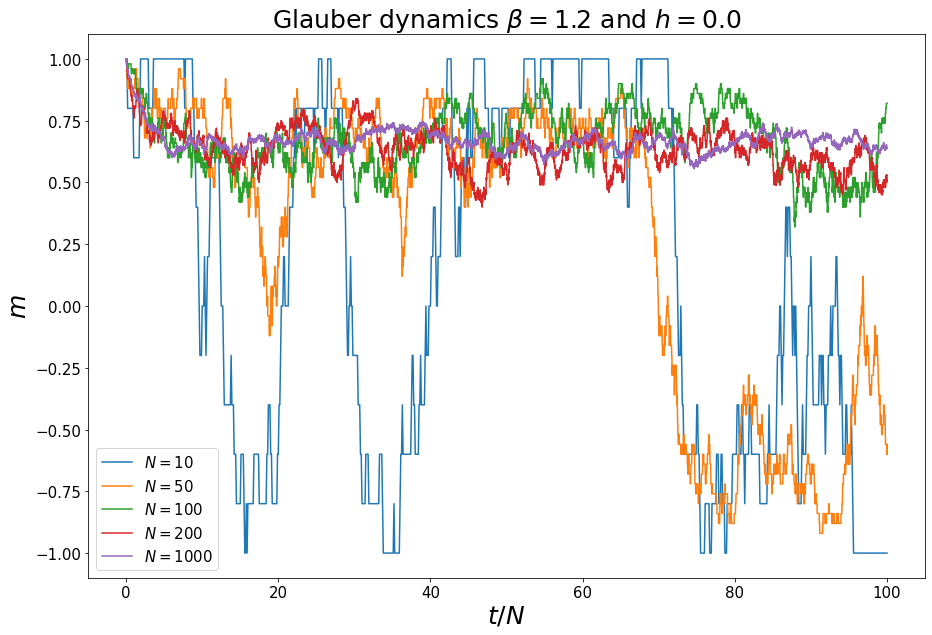

In [191]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))

for n, m in zip(NG, mG_):
    ax.plot(np.arange(0, len(m)) / n ,  m, label= '$N = %d$' % n)
    
ax.set_xlabel('$t/N$', fontsize= 25)
ax.set_ylabel('$m$', fontsize= 25)
ax.tick_params(labelsize=15)
ax.legend(fontsize= 15)
ax.set_title('Glauber dynamics $\\beta =  %.1f $ and $h = %.1f $' % (betaG, hG), fontsize= 25)
plt.show()

### Case $ h = - 0.1 $ and $ \beta = 1.2$

In [192]:
NG1 = [10, 50, 100, 200, 1000]
mG1_ = []
betaG1 = 1.2
hG1 = -0.1

for n in NG1:
    print('N = ', n)
    mG1_.append(Glauber_dyn(n, betaG1, hG1))

N =  10
N =  50
N =  100
N =  200
N =  1000


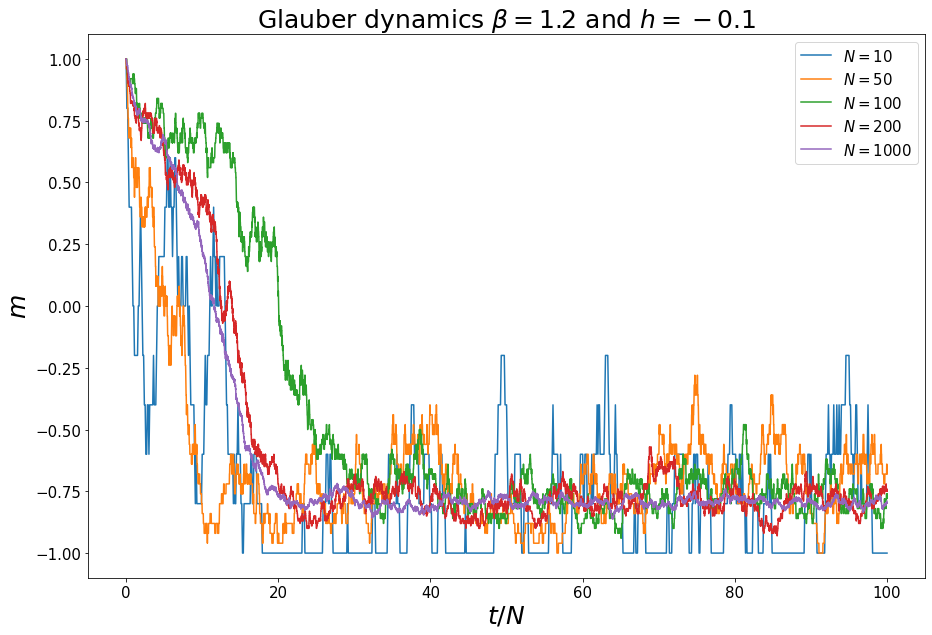

In [193]:
f, ax = plt.subplots(1, 1, figsize = (15, 10))

for n, m in zip(NG1, mG1_):
    ax.plot(np.arange(0, len(m)) / n ,  m, label= '$N = %d$' % n)
    
ax.set_xlabel('$t/N$', fontsize= 25)
ax.set_ylabel('$m$', fontsize= 25)
ax.tick_params(labelsize=15)
ax.legend(fontsize= 15)
ax.set_title('Glauber dynamics $\\beta =  %.1f $ and $h = %.1f $' % (betaG1, hG1), fontsize= 25)
plt.show()

### Part II: Mean-Field Equations from Glauber

#### a) Master equation

We denote $m_t$ the total magnetisation at a time $t$ and define $ P_{t,m} \equiv \mathbb{P} (m_t = m ) $ as the probability that the total magnetisation of the system is $m$ at time $t$. Considering that the system follows Glayber dynamics and a transition occurs on average in a time $ \delta t > 0$, we want to write an expression for $P_{t + \delta t ,m}$ based on the previous possible states at $t$. There are three possible outcomes for a randomly chosen spin $S_j$ within Glauber dynamics:

- $S_{j}^{t} = 1 \; \; \Rightarrow \; \;  S_{j}^{t+ \delta t} = -1$

$$ m_{t} = m  \; \;  \Rightarrow \; \;  m_{t+ \delta t} = m - \frac{2}{N}   $$ 

- $S_{j}^{t} = -1 \; \;  \Rightarrow \; \;  S_{j}^{t+ \delta t} = 1$ 


$$ m_{t} = m  \; \;  \Rightarrow \; \;  m_{t+ \delta t} = m + \frac{2}{N}   $$ 

- $S_{j}^{t} =  S_{j}^{t+ \delta t} $: nothing changes.

Then we can write:

$$  P_{t + \delta t ,m} =   \gamma_{+}   P_{t ,m + \frac{2}{N}}    + \gamma_{-}     P_{t  ,m - \frac{2}{N}}  + \gamma  P_{t  ,m}   \;, $$
where we have introduced the respective transition rates $\gamma_{+}$, $\gamma_{-}$ and $\gamma$ for the three possibilities presented above. Explicitly:

$$   \gamma =   \frac{N_{+}}{N} P_{+} +  \frac{N_{-}}{N} P_{-} \;, $$

$$   \gamma_{\pm} = \left(  \frac{N_{\pm} + 1}{N}   \right) P_{\mp}   \;, $$ 
where $ N_{\pm}$ is the number of spins $ \pm 1$ given by


$$  N_{\pm} = N \left(  \frac{1  \pm m}{2}   \right)   $$  

and $  P_{\pm} = \frac{ 1 \pm \tanh( \beta( m + h)) }{2} $.

Therefore we have the master equation:

$$   P_{t + \delta t ,m} = \left[  \frac{1}{2} \left(  1 + m + \frac{2}{N}  \right) \left( \frac{ 1 -  \tanh(  m + 2/N) }{2} \right) \right] P_{t ,m + \frac{2}{N}}    + \left[ \frac{1}{2} \left(  1 - m + \frac{2}{N}  \right) \left( \frac{ 1 +  \tanh(  m - 2/N) }{2} \right) \right]   P_{t  ,m - \frac{2}{N}}  + \left[ \frac{1}{2} (1-m) \left(  \frac{ 1 - \tanh(  m) }{2}   \right)  +   \frac{1}{2} (1+m) \left(  \frac{ 1 + \tanh(  m) }{2}   \right) \right]  P_{t  ,m}   $$ 




#### b) Expected magnetisation

Define the mean magnetisation with respect to $P_{t,m}$ as

$$ \langle m (t) \rangle \equiv \int dm \; m P_{t,m}    \;. $$

Then we can write

$$   \langle m (t + \delta t) \rangle = \int dm \; m\left[  \frac{1}{2} \left(  1 + m + \frac{2}{N}  \right) \left( \frac{ 1 -  \tanh(  m + 2/N) }{2} \right) \right] P_{t ,m + \frac{2}{N}}    +  \int dm \; m \left[ \frac{1}{2} \left(  1 - m + \frac{2}{N}  \right) \left( \frac{ 1 +  \tanh(  m - 2/N) }{2} \right) \right]   P_{t  ,m - \frac{2}{N}}   \\ +  \int dm  \; m \left[ \frac{1}{2} (1-m) \left(  \frac{ 1 - \tanh(  m) }{2}   \right)  +   \frac{1}{2} (1+m) \left(  \frac{ 1 + \tanh(  m) }{2}   \right) \right]  P_{t  ,m}  $$



#### c) Continuous dynamics for the mean magnetisation

We make the change of variables $m' = m + 2/N $ on the first integral. Since the integration is over the real line, we have:


$$ \int dm \; m\left[  \frac{1}{2} \left(  1 + m + \frac{2}{N}  \right) \left( \frac{ 1 -  \tanh(  m + 2/N) }{2} \right) \right] P_{t ,m + \frac{2}{N}} = 
\int dm' \; \left( m' - \frac{2}{N} \right)    \left[  \frac{1}{2} \left(  1 + m'  \right) \left( \frac{ 1 -  \tanh( m' ) }{2} \right) \right] P_{t , m'}$$

Similarly, we take $m' = m - 2/N $ on the second integral:

$$ \int dm \; m\left[  \frac{1}{2} \left(  1 - m + \frac{2}{N}  \right) \left( \frac{ 1 +  \tanh(  m - 2/N) }{2} \right) \right] P_{t ,m - \frac{2}{N}} = 
\int dm' \; \left( m' + \frac{2}{N} \right)    \left[  \frac{1}{2} \left(  1 - m'  \right) \left( \frac{ 1 +  \tanh( m' ) }{2} \right) \right] P_{t , m'}$$

With these change of varibles and some straighforward algebra, we can write the following expression for $ \langle m (t + \delta t) \rangle   $:

$$   \langle m (t + \delta t) \rangle = \langle m (t) \rangle - \frac{1}{N} \left[ \langle m (t) \rangle  - \langle \tanh (m (t) )\rangle \right]    \;.     $$

Setting $ \delta t = \frac{1}{N} $, 

$$  \frac{ \langle m (t + \delta t) \rangle  -\langle m (t) \rangle  }{\delta t} = - \langle m (t) \rangle  + \langle \tanh (m (t) )\rangle    \;,   $$
and taking $ N \rightarrow \infty$, we can write the r.h.s as a derivative and approximate $ \langle \tanh (m (t) )\rangle \rightarrow \tanh \langle m (t) \rangle$, leading to the following dynamical equation:

$$  \frac{d}{dt} \langle m (t) \rangle = -\langle m (t) \rangle +  \tanh \langle m (t) \rangle $$ 



#### d) Stationary expected magnetization

The stationary solution $ \bar{m}$ of the equation above is obtained by setting 

$$   \frac{d}{dt} \langle m (t) \rangle = 0    \;,$$
which satisfies the Curie-Weiss mean-fied equation.


#### e) Experiments with the theoretical ordinary differential equations


Remeber that the free-entropy is given by

$$ \phi(m, \beta, h) = \frac{1}{2} \beta m^2   + \beta h m + H(m)    \;, $$
with 
$$  H(m) = - \left( \frac{1+m}{2} \right) \log \left( \frac{1+m}{2} \right) - \left( \frac{1-m}{2} \right) \log \left( \frac{1-m}{2} \right)    $$

To investigate, let us first keep the previous value of $\beta = 1.2 $ and vary the external field.

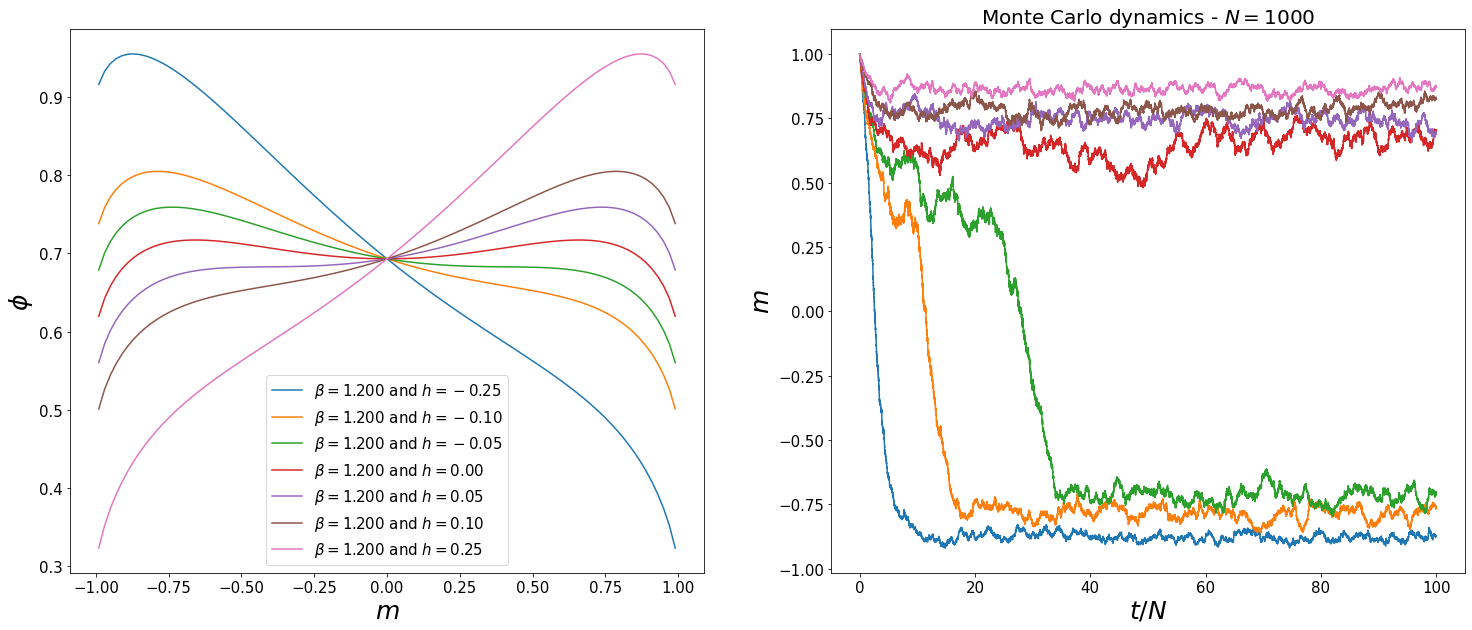

In [44]:
beta_ = [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
h_ = [-0.25, -0.1, -0.05, 0, 0.05, 0.1, 0.25]
N = 1000

m = np.linspace(-0.99, 0.99, 100)

f, ax = plt.subplots(1, 2, figsize = (25, 10))

for beta, h in zip(beta_, h_):
    ax[0].plot(m,  phi(m, beta, h), label= '$\\beta =  %.3f $ and $h = %.2f $' % (beta, h))
    MC_dyn = MCMC(N, beta, h)
    ax[1].plot(np.arange(0, len(MC_dyn)) / N, MC_dyn)
    
ax[0].set_xlabel('$m$', fontsize= 25)
ax[0].set_ylabel('$\\phi$', fontsize= 25)
ax[0].tick_params(labelsize=15)
ax[0].legend(fontsize= 15)
ax[1].set_title('Monte Carlo dynamics - $ N = %d $' % N, fontsize= 20)
ax[1].set_xlabel('$t/N$', fontsize= 25)
ax[1].set_ylabel('$m$', fontsize= 25)
ax[1].tick_params(labelsize=15)
plt.show()

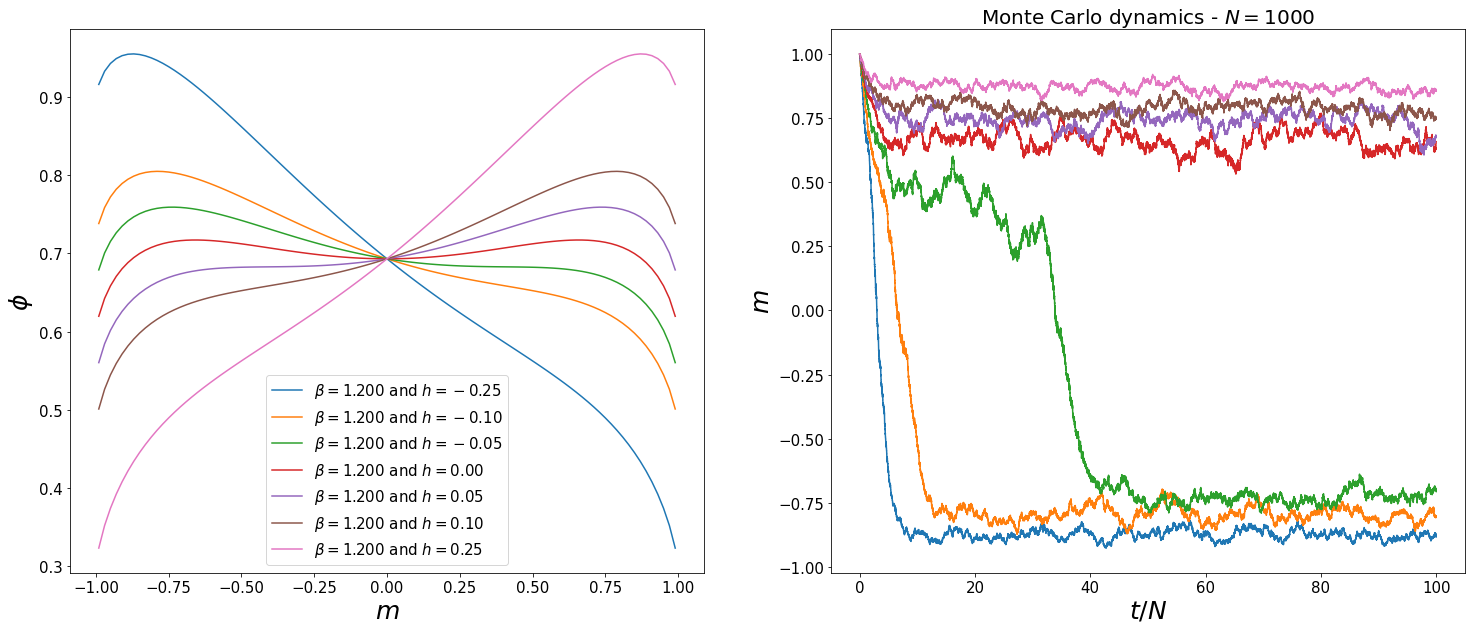

In [45]:
beta_ = [1.2, 1.2, 1.2, 1.2, 1.2, 1.2, 1.2]
h_ = [-0.25, -0.1, -0.05, 0, 0.05, 0.1, 0.25]
N = 1000

m = np.linspace(-0.99, 0.99, 100)

f, ax = plt.subplots(1, 2, figsize = (25, 10))

for beta, h in zip(beta_, h_):
    ax[0].plot(m,  phi(m, beta, h), label= '$\\beta =  %.3f $ and $h = %.2f $' % (beta, h))
    MC_dyn = MCMC(N, beta, h)
    ax[1].plot(np.arange(0, len(MC_dyn)) / N, MC_dyn)
    
ax[0].set_xlabel('$m$', fontsize= 25)
ax[0].set_ylabel('$\\phi$', fontsize= 25)
ax[0].tick_params(labelsize=15)
ax[0].legend(fontsize= 15)
ax[1].set_title('Monte Carlo dynamics - $ N = %d $' % N, fontsize= 20)
ax[1].set_xlabel('$t/N$', fontsize= 25)
ax[1].set_ylabel('$m$', fontsize= 25)
ax[1].tick_params(labelsize=15)
plt.show()

Now we take $ h = 0 $ and vary $\beta $.

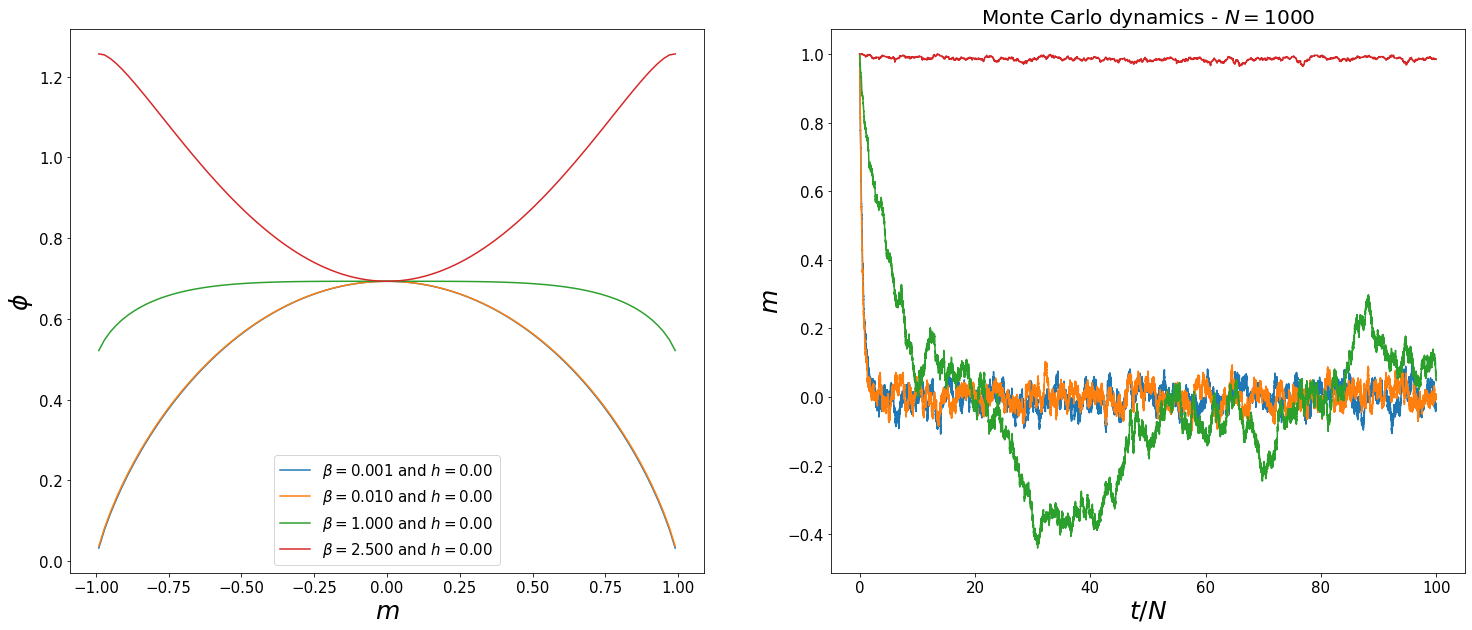

In [46]:
beta_ = [0.001, 0.01, 1, 2.5]
h_ = [0, 0, 0, 0]
N = 1000

m = np.linspace(-0.99, 0.99, 100)

f, ax = plt.subplots(1, 2, figsize = (25, 10))

for beta, h in zip(beta_, h_):
    ax[0].plot(m,  phi(m, beta, h), label= '$\\beta =  %.3f $ and $h = %.2f $' % (beta, h))
    MC_dyn = MCMC(N, beta, h)
    ax[1].plot(np.arange(0, len(MC_dyn)) / N, MC_dyn)
    
ax[0].set_xlabel('$m$', fontsize= 25)
ax[0].set_ylabel('$\\phi$', fontsize= 25)
ax[0].tick_params(labelsize=15)
ax[0].legend(fontsize= 15)
ax[1].set_title('Monte Carlo dynamics - $ N = %d $' % N, fontsize= 20)
ax[1].set_xlabel('$t/N$', fontsize= 25)
ax[1].set_ylabel('$m$', fontsize= 25)
ax[1].tick_params(labelsize=15)
plt.show()

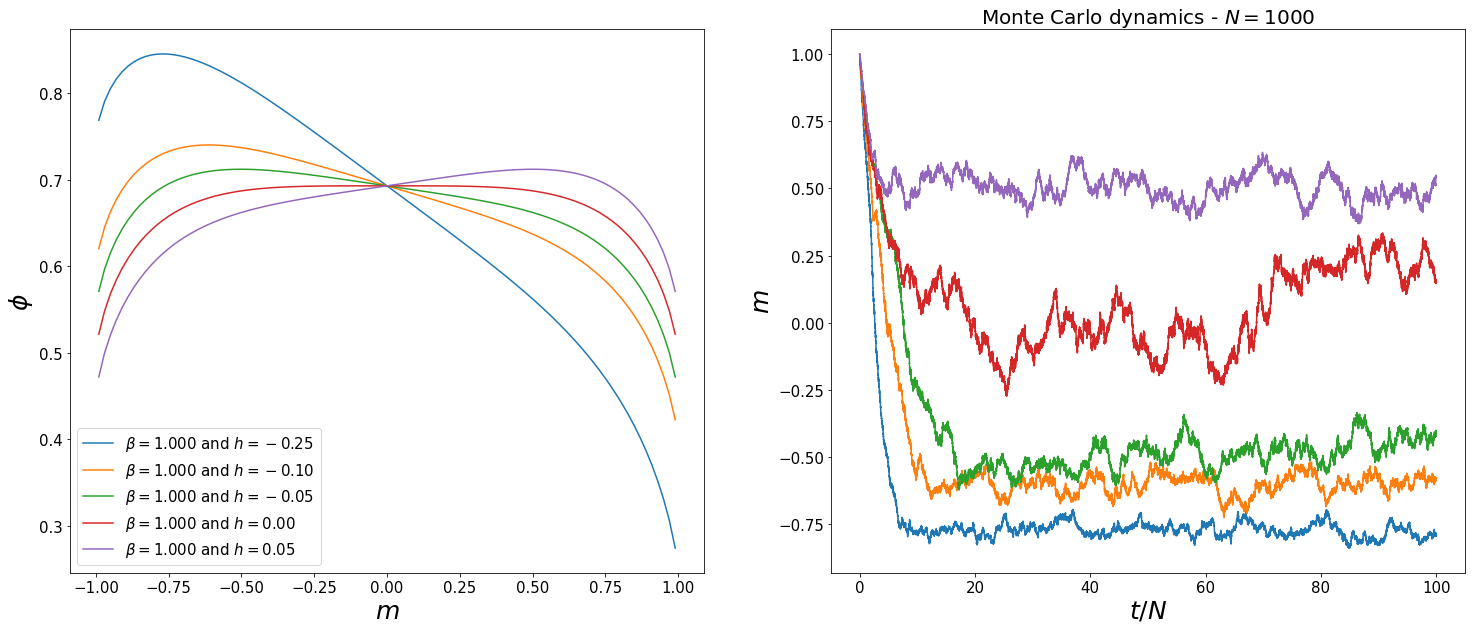

In [47]:
beta_ = [1, 1, 1, 1, 1]
h_ = [-0.25, -0.1, -0.05, 0, 0.05, 0.1]
N = 1000

m = np.linspace(-0.99, 0.99, 100)

f, ax = plt.subplots(1, 2, figsize = (25, 10))

for beta, h in zip(beta_, h_):
    ax[0].plot(m,  phi(m, beta, h), label= '$\\beta =  %.3f $ and $h = %.2f $' % (beta, h))
    MC_dyn = MCMC(N, beta, h)
    ax[1].plot(np.arange(0, len(MC_dyn)) / N, MC_dyn)
    
ax[0].set_xlabel('$m$', fontsize= 25)
ax[0].set_ylabel('$\\phi$', fontsize= 25)
ax[0].tick_params(labelsize=15)
ax[0].legend(fontsize= 15)
ax[1].set_title('Monte Carlo dynamics - $ N = %d $' % N, fontsize= 20)
ax[1].set_xlabel('$t/N$', fontsize= 25)
ax[1].set_ylabel('$m$', fontsize= 25)
ax[1].tick_params(labelsize=15)
plt.show()